In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [3]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [4]:
alumnos = pd.DataFrame(lista_alumnos)
alumnos.rename(columns={0:"nombre",1:"edad",2:"altura"},inplace=True)
alumnos.describe()

,edad,altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


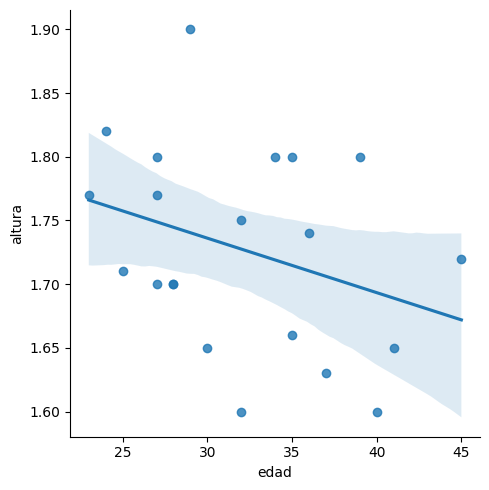

In [5]:
sns.lmplot(data = alumnos, y="altura",x="edad" )

### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

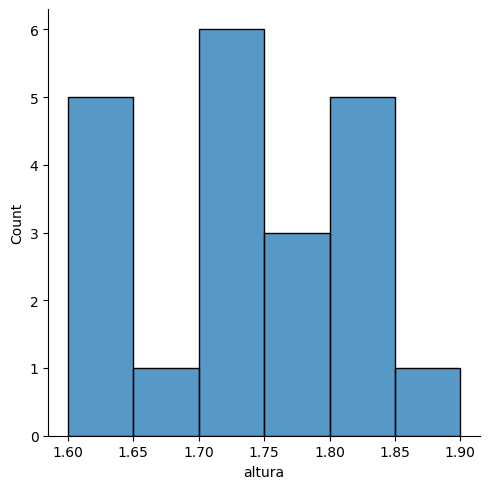

In [6]:
sns.displot(alumnos["altura"])

In [7]:
alumnos["altura"].corr(alumnos["edad"])

np.float64(-0.32927497954842544)

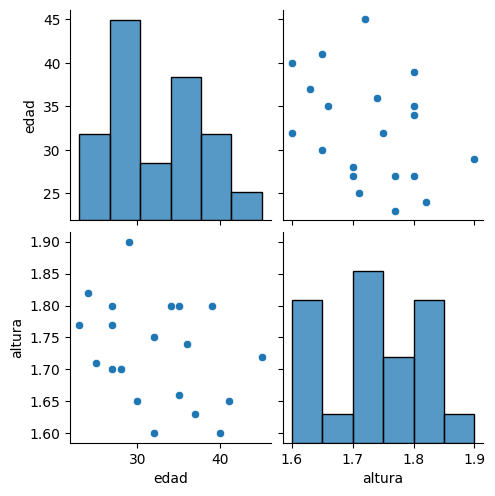

In [8]:
sns.pairplot(alumnos)

### Entrena un modelo de regresión lineal

In [16]:
X = alumnos [["edad"]]
y = alumnos [["altura"]]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [19]:
modelo_1 = LinearRegression()

In [20]:
modelo_1.fit(X_train,y_train)

LinearRegression()

In [21]:
predicciones = modelo_1.predict(X_test)

### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

In [27]:
error = y_test - predicciones
error["absoluto"]=error["altura"].abs()
error_medio = error["absoluto"].sum()/len(y_test)
error_medio

np.float64(0.05318486080700664)

In [23]:
modelo_1.score(X_test, y_test)

-1.0398087196617292

In [24]:
metrics.mean_absolute_error(y_test,predicciones)

0.05318486080700664

In [25]:
metrics.mean_squared_error(y_test,predicciones)

0.0033126493607306537

In [26]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test,predicciones))
RMSE

np.float64(0.057555619714591326)